# House Prices - Advanced Regression Techniques


In [3]:
# Here will be put all necessary dependencies
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz
import pydotplus

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso, LassoCV

from sklearn.linear_model import Ridge, RidgeCV

from sklearn.linear_model import BayesianRidge

In [4]:
# Loading both given datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
print(df_train.shape, " row/column structure of train data")
print(df_test.shape, " row/column structure of test data")

(1460, 81)  row/column structure of train data
(1459, 80)  row/column structure of test data


In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


So, train data contains 1460 rows and 80 features (excluding Id).
Test data has 1459 rows and 79 features (excluding Id).
The target feature of the dataset is SalesPrice, so it has to be predicted for the test dataset based on the model created from the train dataset data.

It is planned to construct various models for the project, using different approaches and tuning, and then compare the outcome.

## Data exploration

Features in the dataset and their values/ranges

In [8]:
# All features
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# All datatypes
df_train.info(verbose=True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [11]:
df_train.describe(include=["object"]).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [12]:
check_train = df_train.describe(include=["object"])
check_test = df_test.describe(include=["object"])

In [13]:
# Checking that train and test data have the same amount of used values for the features.

for i in check_train:
    print(f"Checking feature {i}")
    print(check_test[i]['count'], check_test[i]['unique'])
    print(check_test[i]['count'], check_test[i]['unique'])
    
    if(check_train[i]['unique'] < check_test[i]['unique']):
        print("Difference")
    
    print()
    

Checking feature MSZoning
1455 5
1455 5

Checking feature Street
1459 2
1459 2

Checking feature Alley
107 2
107 2

Checking feature LotShape
1459 4
1459 4

Checking feature LandContour
1459 4
1459 4

Checking feature Utilities
1457 1
1457 1

Checking feature LotConfig
1459 5
1459 5

Checking feature LandSlope
1459 3
1459 3

Checking feature Neighborhood
1459 25
1459 25

Checking feature Condition1
1459 9
1459 9

Checking feature Condition2
1459 5
1459 5

Checking feature BldgType
1459 5
1459 5

Checking feature HouseStyle
1459 7
1459 7

Checking feature RoofStyle
1459 6
1459 6

Checking feature RoofMatl
1459 4
1459 4

Checking feature Exterior1st
1458 13
1458 13

Checking feature Exterior2nd
1458 15
1458 15

Checking feature MasVnrType
1443 4
1443 4

Checking feature ExterQual
1459 4
1459 4

Checking feature ExterCond
1459 5
1459 5

Checking feature Foundation
1459 6
1459 6

Checking feature BsmtQual
1415 4
1415 4

Checking feature BsmtCond
1414 4
1414 4

Checking feature BsmtExposure

In [14]:
df_train[df_train.isnull().any(axis=1)]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [16]:
for i in df_train.columns:
    print(i)
    print(df_train[i].count())

Id
1460
MSSubClass
1460
MSZoning
1460
LotFrontage
1201
LotArea
1460
Street
1460
Alley
91
LotShape
1460
LandContour
1460
Utilities
1460
LotConfig
1460
LandSlope
1460
Neighborhood
1460
Condition1
1460
Condition2
1460
BldgType
1460
HouseStyle
1460
OverallQual
1460
OverallCond
1460
YearBuilt
1460
YearRemodAdd
1460
RoofStyle
1460
RoofMatl
1460
Exterior1st
1460
Exterior2nd
1460
MasVnrType
1452
MasVnrArea
1452
ExterQual
1460
ExterCond
1460
Foundation
1460
BsmtQual
1423
BsmtCond
1423
BsmtExposure
1422
BsmtFinType1
1423
BsmtFinSF1
1460
BsmtFinType2
1422
BsmtFinSF2
1460
BsmtUnfSF
1460
TotalBsmtSF
1460
Heating
1460
HeatingQC
1460
CentralAir
1460
Electrical
1459
1stFlrSF
1460
2ndFlrSF
1460
LowQualFinSF
1460
GrLivArea
1460
BsmtFullBath
1460
BsmtHalfBath
1460
FullBath
1460
HalfBath
1460
BedroomAbvGr
1460
KitchenAbvGr
1460
KitchenQual
1460
TotRmsAbvGrd
1460
Functional
1460
Fireplaces
1460
FireplaceQu
770
GarageType
1379
GarageYrBlt
1379
GarageFinish
1379
GarageCars
1460
GarageArea
1460
GarageQual
137

In [17]:
df_train_work = df_train.copy()

## Missing data handeling

At first, let's see what data is missing.

In [18]:
missing_data = (df_train.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')

In [19]:
missing_data[missing_data["missing"] != 0]

,missing
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


The big number of missed values are in the first several features. Let's see what is inside:

In [20]:
df_train_work["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

Basically, NaNs for some features are defined in the description to the data as NA, showing that the particular house has not this feature in it. E.g. PoolQC NaN should be interpreted as the house has no swimming pool. <br>
Features that allowed NA by description are:
- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

So, these 14 features will not be dropped due to NaNs, NaNs will be interpreted as NA.

In [21]:
missing_data.drop(
    ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature'], axis=0, inplace = True)


In [22]:
missing_data[missing_data["missing"] != 0]

,missing
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8
MasVnrType,8
Electrical,1


Now 5 features left. GarageYrBlt NaNs are the same as the number of houses without garages, so it is ok to left it as it is (later transforming NaN to something appropriate). The rest 4 features can be dropped. Perhaps, it is possible to assume which values can be fixed in NaNs of MasVnrType and Electrical, but LotFrontage and MasVnrArea are not guessable, as well as using some aggregate value can lead to a false assumptions and incorrect models.

It should be noted, that corresponding changes has to be done in the dataset for prediction too.

In [23]:
df_train_work.drop(['LotFrontage', 
                    'MasVnrArea', 
                    'MasVnrType', 
                    'Electrical'], 
                   axis=1, inplace = True)

df_test.drop(['LotFrontage', 
                    'MasVnrArea', 
                    'MasVnrType', 
                    'Electrical'], 
                   axis=1, inplace = True)

In [24]:
for col in ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature']:
    df_train_work[col] = df_train_work[col].replace(np.nan, "NA")
    df_test[col] = df_test[col].replace(np.nan, "NA")

In [25]:
df_train_work['GarageYrBlt'] = df_train_work['GarageYrBlt'].replace(np.nan, 0)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].replace(np.nan, 0)

Also,GarageYrBlt feature was considered as float, so have to cast it to int.

In [26]:
df_train_work['GarageYrBlt'] = df_train_work['GarageYrBlt'].astype(int)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].astype(int)

Data for prediction might have its own missed values.

In [27]:
(df_test.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')


,missing
MSZoning,4
BsmtFullBath,2
BsmtHalfBath,2
Utilities,2
Functional,2
GarageArea,1
TotalBsmtSF,1
BsmtUnfSF,1
BsmtFinSF2,1
KitchenQual,1


Indeed it has. All the values are numerical, so it can be assumed that they are 0's (no such thing exist in the house).

In [28]:
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].replace(np.nan, 0)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].replace(np.nan, 0)
df_test['GarageCars'] = df_test['GarageCars'].replace(np.nan, 0)
df_test['GarageArea'] = df_test['GarageArea'].replace(np.nan, 0)
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].replace(np.nan, 0)
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].replace(np.nan, 0)
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].replace(np.nan, 0)
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].replace(np.nan, 0)

(df_test.isnull().sum().sort_values(ascending=False)).to_frame(name='missing')


,missing
MSZoning,4
Utilities,2
Functional,2
Exterior2nd,1
SaleType,1
Exterior1st,1
KitchenQual,1
TotRmsAbvGrd,0
GarageFinish,0
GarageYrBlt,0


This finishes data cleaning for now (still categorical features remain categorical).

## Exploratory analysis

It's good to start with a correlation (of numerical features only) to see, whether there is any correlation at all (using both Pearson and Spearman correlation).

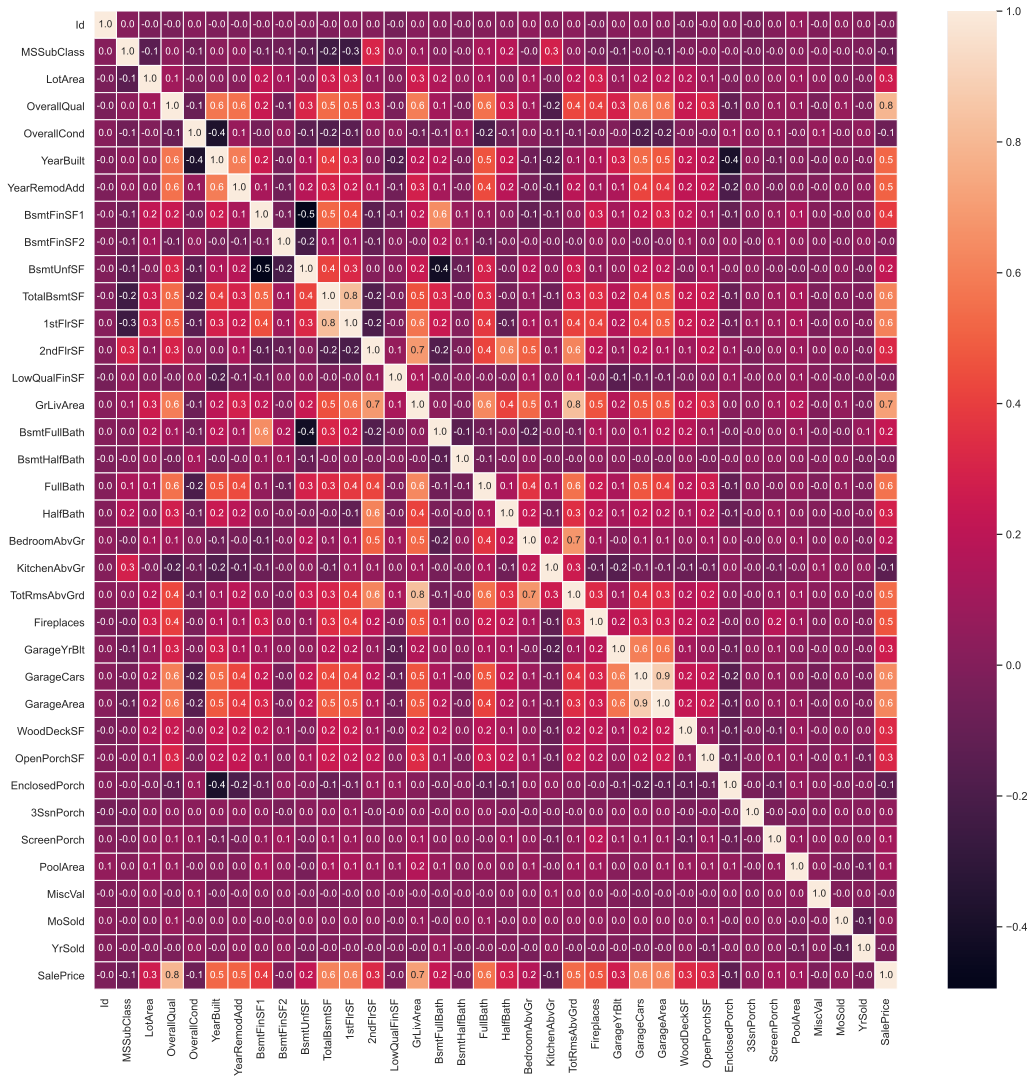

In [29]:
fig, ax = plt.subplots(figsize=(18,18)) 

corr = df_train_work.corr()
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1.0, ax=ax);

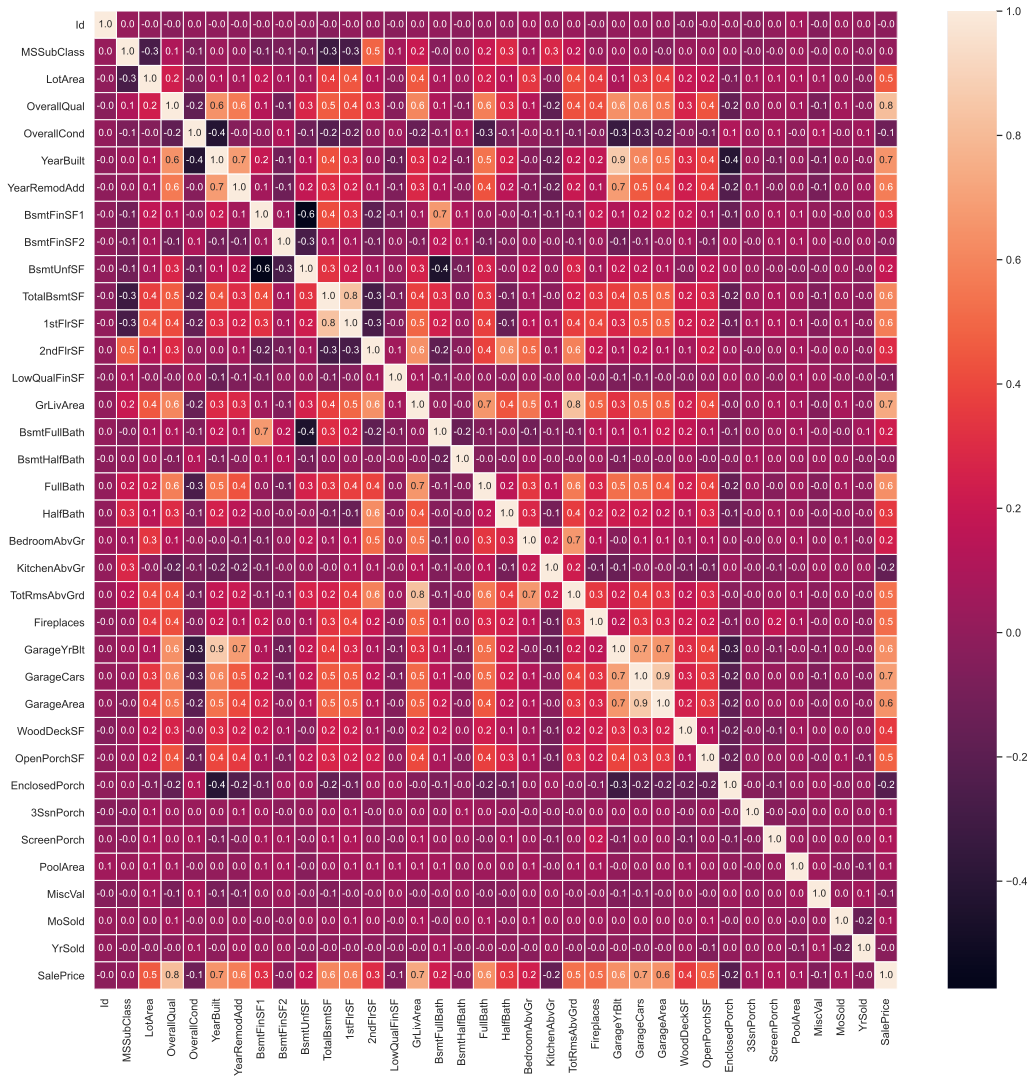

In [30]:
fig, ax = plt.subplots(figsize=(18,18)) 

corr_sp = df_train_work.corr(method="spearman")
sns.heatmap(corr_sp, annot=True, fmt=".1f", linewidths=1.0, ax=ax);

There quite a number features, so heatmaps are quite big. Nevertheless, some features have quite high correlation with target feature SalePrice:
- LotArea
- OverallQual (seems like it could be main predictor)
- YearBuilt
- YearRemodeAdd
- TotalBsmtSF
- 1srFlrSF
- GrLivAreaa
- FullBath
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- OpenPorchSF

All of them has positive correlation with the target feature. Also, it should be noted, that there are several features who have very strong correlation between them, so there could be a problem with e.g. multicollinearity in some linear model approaches. Such features are: GarageYrBlt and YearBuilt (0.9, almost full correlation, like a linear combination), as well as GarageYrBlt and YearRemodeAdd (0.7), TotRmsAbvGrd and GrLivArea, (0.8). 
<br>
For some models, features that has no, or non-significant correation, presumably can be dropped.

Next thing to look at - the distribution of the dependent variable (target feature).

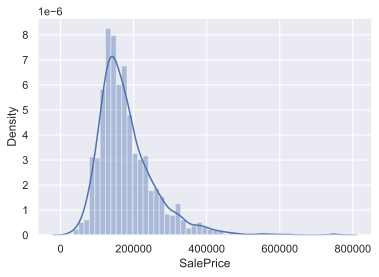

In [31]:
sns.distplot(df_train_work["SalePrice"]);

Distplot is showing that it is looks like a normal distirbution (almost), with positive skewness. Thus, the distribution is a right-skewed (has a peak on the left side, and a long tail on the right). 

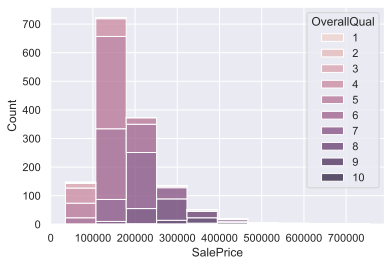

In [32]:
sns.histplot(x = 'SalePrice', hue = 'OverallQual', data = df_train_work, bins=10, multiple="stack");

Histplot with 10 bins for SalePrice and OverallQual as a stacked bar (exploring the highly correlated feature), showing that yes, as the price going up - the overall quality of the real estate is also increasing (as a trend), but not fully describes particular bin.

There are really many features to look at, but now I move to the categorical features and see relation of some of them to the target feature.

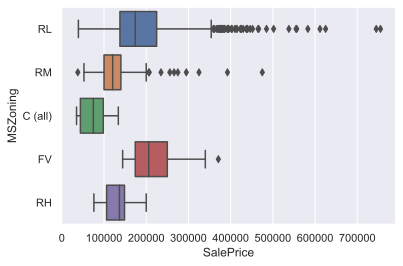

In [33]:
sns.boxplot(
    y="MSZoning",
    x="SalePrice",
    data=df_train_work,
    orient="h",
);

Boxplot shows, that all of the highest prices (even though they are outliars), are related to the one single zone - RL. However the median price is lower than in FV.
<br>
<br>
The lowest median prices is in C zone.
<br>
<br>
RH and RM are quite the same between Q1 and Q3, as well as for right whisker, but RM has several high-prices properties (which are outliers). 

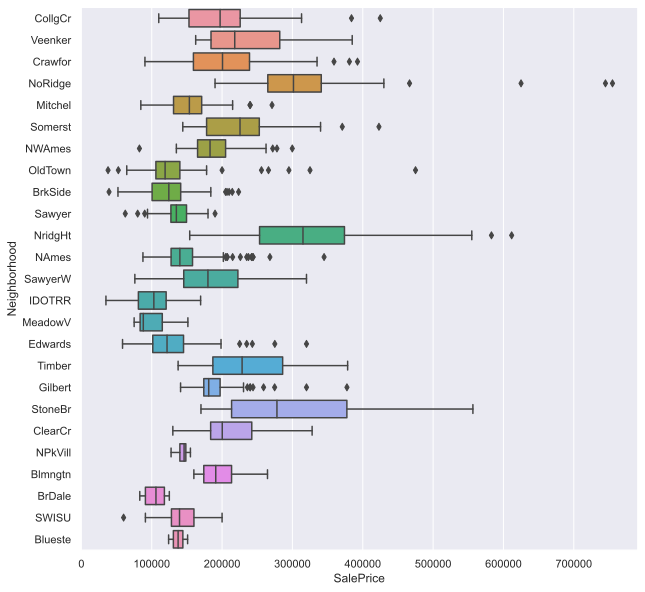

In [34]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.boxplot(
    y="Neighborhood",
    x="SalePrice",
    data=df_train_work,
    orient="h",
    ax = ax,
);

The neighborhood analysis shows, that the real estate in some of the areas are cost more, than the in the others. As well as there are several well-distinguishable neighborhoods with lower cost.

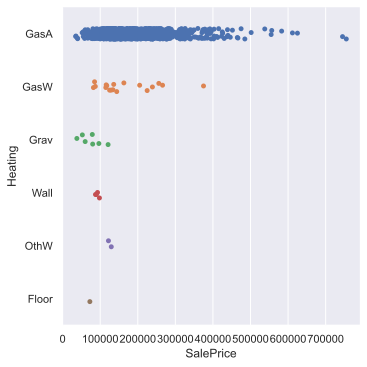

In [35]:
sns.catplot(x="SalePrice", y="Heating", data=df_train_work);

The distribution of the Heating feature is not equal, but it is clearly seen, that GasA type of heating is prevailing and, the high-priced houses come only with GasA type.

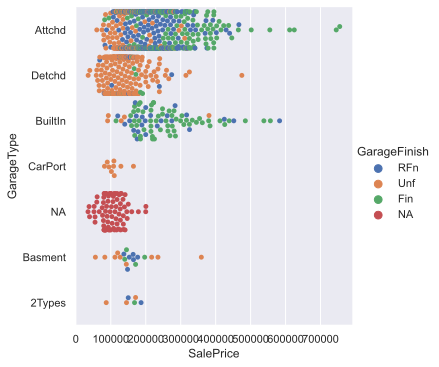

In [36]:
sns.catplot(x="SalePrice", y="GarageType", 
            hue = "GarageFinish", data=df_train_work, kind="swarm");


This are the features, that were changed to NA from NaNs. And it is interesting to see, that NA = NA, so NaNs were interpreted correctly. It is also giving an information, that no garage leads to smaller price, than BuiltIn or Attached type. Higher price is prevailing, when the garage is finished or RFned, but there are couple of exceptions, where the garage is unfinished, but the price is high enough (it is explained by some other factors).

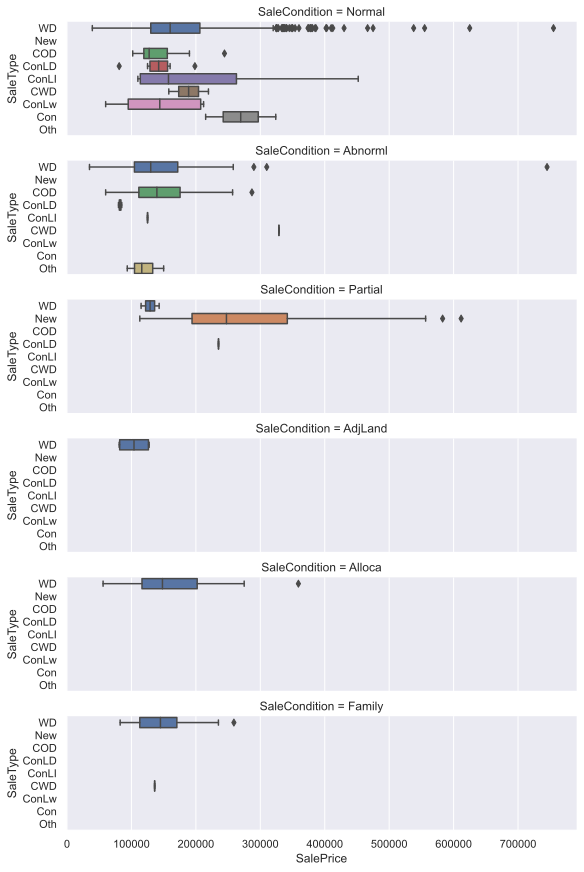

In [37]:
g = sns.catplot(x="SalePrice", y="SaleType", row="SaleCondition",
                kind="box", orient="h", height=2, aspect=4,
                data=df_train_work)


Some cases in this catplot indicating low price combinations of SaleType and SaleCondition, but the most interesting is New + Partial, which has higher price in general, than the rest of the combinations.

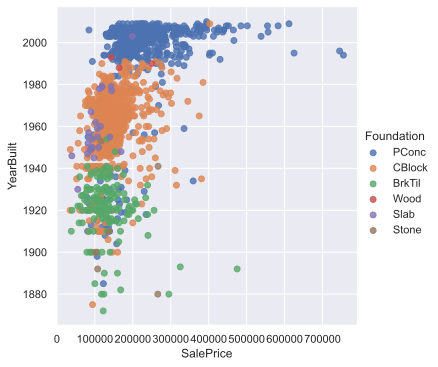

In [38]:
sns.lmplot("SalePrice", "YearBuilt", data=df_train_work, hue="Foundation", fit_reg=False);

Lmplot is showing interesting natural "clustering", by showing which technology was the main for the house foundation throughout the years. But it gives no real practical value. But, the other thing that is nicely shown here is that houses that cost more 400,000 are modern ones (1980 and newer). Only one older house cost more than 400,000.

For now this is it with visualization of the data. The section could be expanded, if the need will arise.

## Models

### Naive approach - Label encoding + Multiple linear regression

The first thing to try - is the most simple linear model. In order to put in all the features, the categorical ones have to be transformed to numerical. There are several approaches to it. I'll start with the label encoding, but keeping in mind, that such an approach is usually bad, as values of the features becoming directly comparable, which lead to misinterpretation in models.
<br>

But this model will be such a milestone (for comparing the rest of the models), perhaps being the worst one overall.

In [39]:
# Making a copy of the main df, in order not to mess with already cleared data
df_train_work_le = df_train_work.copy()

# Target variable is separated and dropped. Also Id is dropped, as it is useless for predictions
y_train = df_train_work_le["SalePrice"]
df_train_work_le.drop(["SalePrice", "Id"], axis=1, inplace = True)

# Each of the categorical features (object type) is transformed to numerical
for col in df_train_work.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded = le.fit_transform(df_train_work[col])
    df_train_work_le[col] = encoded


In [40]:
# Yup, it worked out
df_train_work_le.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4
1,20,3,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4
2,60,3,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4
3,70,3,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,4,0,4,1,4,0,216,6,0,540,756,1,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0
4,60,3,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4


In [41]:
# Id of the dataset for prediction is saved explicitly and dropped
id_test = df_test["Id"].copy()
df_test.drop(["Id"], axis=1, inplace = True)
df_test_le = df_test.copy()
# The rest is the same - encoded categorical features
for col in df_test_le.select_dtypes(include='object').columns:
    le = LabelEncoder()
    encoded = le.fit_transform(df_test_le[col])
    df_test_le[col] = encoded

In [42]:
# Fit the model with 75 predictors
reg_le = LinearRegression().fit(df_train_work_le, y_train)
reg_le.score(df_train_work_le, y_train)


0.8498456558487146

The $R^2$ of the created model is quite good for starters, I have expected much worser, 84.98% of changes in SalePrice is explained by these 75 features.

However, the model (from statistical point of view) is higly suffered from multicollinearity. The check is very rough, but VIF (variance inflation factor) can be calculated, e.g. by the statsmodels:

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
mult_counter = 0
for i in range(75):
    res = variance_inflation_factor(df_train_work_le.to_numpy(), i)
    print(res)
    if res > 5:
        mult_counter += 1
        
print("Total mult: ", mult_counter)

14.896693820799813
35.831016145605055
3.4229243011008057
286.3092083069764
21.584502327214935
3.6362617580024277
21.521647762269208
1.0829045794036245
5.02314386857762
1.7064652706017647
6.452964703627985
7.303217640680461
67.0656341591585
5.323442685262756
7.847226924473326
79.86526768089111
50.71794988980922
30944.71870701853
24844.561897997835
4.828242608210393
5.016466645770515
40.51422691738961
38.397897297541036
38.42561875697684
33.04303031383946
9.739160318894202
13.869117832222804
19.5324923531572
6.779936551295016
5.836874083185575
inf
52.11882184820971
inf
inf
inf
17.246528495415223
2.965194056000999
26.99920009167772
inf
inf
inf
inf
3.9075848051069024
1.3066699107366457
28.669347655475264
3.704650122600261
35.579527768252596
41.25964814557952
18.47637795211866
90.45987598307148
44.18773412758857
3.207859136700916
9.734673403713817
5.599744633400944
50.55897095460496
6.239563581907938
42.7622300357154
33.86573534496028
56.95058391258934
75.16968951362138
22.82096379304172
2.

So, the VIF > 5 showing that there is a mulicollinearity, and in this model 59 features are demonstrating it. Thus the model can be very biased, and poorly interpretable, even if the $R^2$ is high. The large standard errors will be also due to it.

Another thing to notice, that I did not split the train data into train and validation subsets due to the low number of observations. Thus the model may be biased (overfitted) based on the training set.

Nevertheless, it is time to make a prediction and see the results. Nevertheless, nothing good is expected from this model.

In [45]:
# Combining Id + prediction to comply with the format of submission
result_le = id_test
result_le = result_le.to_frame()
result_le["SalePrice"] = reg_le.predict(df_test_le)

In [46]:
result_le.to_csv('result_le.csv', index=False)

The Kaggle gives a result of RMSE is 0.44779, which is very high. Nevertheless, this is a milestone for making a better models. The Muitiple Linear Regression is not the great choice for the dataset. The relation between the data is not linear too. From the statistical point of view the resulted model can be tuned, various different statistics / feature importance / disabling mulicollinearity / scedasticity checking / etc can be done, but it could give a litte value from the ML point of view.
<br>

Label encoding is not the great to be used either and it is giving its own bias in the results too.


## Dummy variables + Multiple linear regression

Another approach is to encode variables as dummy variables columns.

In [47]:
categorical_columns = [c for c in df_train_work.columns if df_train_work[c].dtype.name == "object"]
numerical_columns = [c for c in df_train_work.columns if df_train_work[c].dtype.name != "object"]

In [48]:
df_train_work_dv = pd.concat(
    [df_train_work[numerical_columns], pd.get_dummies(df_train_work[categorical_columns])],
    axis=1,
)

In [49]:
numerical_columns.remove('Id')
numerical_columns.remove('SalePrice')
df_test_work_dv = pd.concat(
    [df_test[numerical_columns], pd.get_dummies(df_test[categorical_columns])],
    axis=1,
)

Interesting problem arises - the number of features in training set is somehow more than in test after making it as dummy. 

In [50]:
print(df_train_work_dv.shape)
print(df_test_work_dv.shape)

(1460, 293)
(1459, 274)


There 2 ways how to deal with it - add missing columns to test dataset filled with 0's or fully drop extra columns from train dataset. I use the second approach.

In [51]:
for i in df_test_work_dv.columns:
    if i not in df_train_work_dv.columns:
        print(i)

In [52]:
for i in df_train_work_dv.columns:
    if i not in df_test_work_dv.columns:
        df_train_work_dv.drop([i], axis = 1, inplace = True)
        print(i)

Id
SalePrice
Utilities_NoSeWa
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
HouseStyle_2.5Fin
RoofMatl_ClyTile
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_Other
Heating_Floor
Heating_OthW
GarageQual_Ex
PoolQC_Fa
MiscFeature_TenC


In [53]:
print(df_train_work_dv.shape)
print(df_test_work_dv.shape)

(1460, 274)
(1459, 274)


In [54]:
df_train_work_dv.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,PoolQC_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Sh

In [55]:
df_test_work_dv.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,PoolQC_NA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_Gar2,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Sh

In [56]:
reg_dv = LinearRegression().fit(df_train_work_dv, y_train)
reg_dv.score(df_train_work_dv, y_train)

0.9251872657219886

$R^2$ for the model is higher - 92.52%, but considering the number of features - it is hardly doing any good due to the multicollinearity isuues.

In [57]:
result_dv = id_test
result_dv = result_dv.to_frame()
result_dv["SalePrice"] = reg_dv.predict(df_test_work_dv)

In [58]:
result_dv.to_csv('result_dv.csv', index=False)

MSE is went up 0.52509, thus the model became worse. The other options (like add missing columns filled with 0 to the test data lead to even worser MSE).

After using these 2 models data is nicely prepared as:
- df_train_work_le - labeled training set
- df_test_le - labeled set for prediction
- df_train_work_dv - dummy training set
- df_test_work_dv - dummy set for prediction
- y_train - target variable for training

## Decision tree regressor - tuned tree (label encoding)

Looking for the best parameters for tree by looking at various combinatios of max_depth + max_features.

In [60]:
tree_params = {"max_depth": range(2, 50),
              "max_features": range(2, 76, 4)}

tree = DecisionTreeRegressor(random_state=17)
locally_best_tree = GridSearchCV(tree, tree_params, cv=5)
locally_best_tree.fit(df_train_work_le, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=17),
             param_grid={'max_depth': range(2, 50),
                         'max_features': range(2, 76, 4)})

In [61]:
print("Tree information:", round(locally_best_tree.best_score_ * 100, 2), "%")
print("Best_params:", locally_best_tree.best_params_)

Tree information: 77.15 %
Best_params: {'max_depth': 18, 'max_features': 54}


With these results fitting the tree:

In [62]:
tuned_tree = DecisionTreeRegressor(max_depth=18, max_features = 54 ,random_state = 17)
tuned_tree.fit(df_train_work_le, y_train)
tuned_tree_predictions = tuned_tree.predict(df_test_le)

In [64]:
result_tr = id_test
result_tr = result_tr.to_frame()
result_tr["SalePrice"] = tuned_tree_predictions
result_tr.to_csv('tuned_tree_predictions.csv', index=False)

The results are becoming better - RMSE went down to 0.20753, which is a huge improvement overall, compared to the linear models.

In [76]:
def tree_graph_to_svg(tree, feature_names, png_file_to_save, class_name):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None, class_names=class_name,
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    #graph.write_png(png_file_to_save)
    graph.write_svg(png_file_to_save)

In [77]:
tree_graph_to_svg(
    tree=tuned_tree,
    feature_names=df_train_work_le.columns,
    png_file_to_save="tuned_tree.svg",
    class_name = None
)

The resulted tree visualization is too big to show here, but it can be seen in the folder explicitly.

Overall, model performed better, but results are more biased based on the training set.

## Random Forest Regressor (not tuned, label encoding)

Nothing more to say - deafult RF regressor, not tuned, used label encoding.

In [80]:
rf_nt = RandomForestRegressor(n_estimators=100, random_state=17)
rf_nt.fit(df_train_work_le, y_train)
pr_nt = rf_nt.predict(df_test_le)

In [82]:
result_rf_nt = id_test
result_rf_nt = result_rf_nt.to_frame()
result_rf_nt["SalePrice"] = pr_nt
result_rf_nt.to_csv('rfr_nt.csv', index=False)

The results are improved, compared to the Tuned Tree, RMSE went down to 0.14604. The best result so far.

## Random Forest Regressor (not tuned, dummy variables)

Let's see how the results are differ with usage of dummy variables (the rest is the same):

In [83]:
rf_nt_dv = RandomForestRegressor(n_estimators=100, random_state=17)
rf_nt_dv.fit(df_train_work_dv, y_train)
pr_nt_dv = rf_nt_dv.predict(df_test_work_dv)

In [85]:
result_rf_nt_dv = id_test
result_rf_nt_dv = result_rf_nt_dv.to_frame()
result_rf_nt_dv["SalePrice"] = pr_nt_dv
result_rf_nt_dv.to_csv('rfr_nt_dv.csv', index=False)

The results are slightly improved, RMSE went is 0.14517.

## Random Forest Regressor (tuned, label encoding)

In [97]:
forest_params = {'max_depth': range(2, 50, 2), 'max_features': range(2, 76, 2)}
tree_forest = RandomForestRegressor(n_estimators=100, random_state=17, n_jobs=-1)
locally_best_forest = GridSearchCV(tree_forest, forest_params, cv=5, n_jobs=-1, verbose=True)

locally_best_forest.fit(df_train_work_le, y_train);

Fitting 5 folds for each of 888 candidates, totalling 4440 fits


In [98]:
locally_best_forest.best_params_

{'max_depth': 22, 'max_features': 34}

In [99]:
pr_tu = locally_best_forest.predict(df_test_le)

In [100]:
result_pr_tu = id_test
result_pr_tu = result_pr_tu.to_frame()
result_pr_tu["SalePrice"] = pr_tu
result_pr_tu.to_csv('rfr_tu.csv', index=False)

I tries also with cv=3, different range and so on. With it - depth 18, max features = 62; RMSE was 0.14957, which is worser than not-tuned forest.

With current values of max depth = 22, max features = 34, RMSE improved: 0.14395.

## Random Forest Regressor (tuned, dummy variables)

In [137]:
forest_params_dv = {'max_depth': range(2, 50, 2), 'max_features': range(2, 275, 5)}
tree_forest_dv = RandomForestRegressor(n_estimators=100, random_state=17, n_jobs=-1)
locally_best_forest_dv = GridSearchCV(tree_forest_dv, forest_params_dv, cv=5, n_jobs=-1, verbose=True)

locally_best_forest_dv.fit(df_train_work_dv, y_train);

Fitting 5 folds for each of 1320 candidates, totalling 6600 fits


In [138]:
pr_tu_dv = locally_best_forest_dv.predict(df_test_work_dv)

In [140]:
locally_best_forest_dv.best_params_

{'max_depth': 14, 'max_features': 82}

In [141]:
result_pr_tu_dv = id_test
result_pr_tu_dv = result_pr_tu_dv.to_frame()
result_pr_tu_dv["SalePrice"] = pr_tu_dv
result_pr_tu_dv.to_csv('rfr_tu_dv.csv', index=False)

With the locally best forest (max depth 14, max features = 82) RMSE is 0.14392.

## Lasso Regression (label encoding, simple)

In [106]:
lasso = Lasso(alpha=0.01, random_state=17)
lasso.fit(df_train_work_le, y_train);

In [107]:
pr_lasso = lasso.predict(df_test_le)

In [112]:
result_pr_lasso = id_test
result_pr_lasso = result_pr_lasso.to_frame()
result_pr_lasso["SalePrice"] = pr_lasso
result_pr_lasso.to_csv('result_lasso.csv', index=False)

Minor improvement from Linear regression. RMSE is 0.44778.

## Lasso Regression (label encoding, cross-validation)

In [109]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, random_state=17, cv=5)
lasso_cv.fit(df_train_work_le, y_train);

In [113]:
pr_lasso_cv = lasso_cv.predict(df_test_le)

In [114]:
result_pr_lasso_cv = id_test
result_pr_lasso_cv = result_pr_lasso_cv.to_frame()
result_pr_lasso_cv["SalePrice"] = pr_lasso_cv
result_pr_lasso_cv.to_csv('result_lasso_cv.csv', index=False)

Improvement from ordinary Lasso. RMSE = 0.32349.

## Rigde Regression (label encoding, simple)

In [116]:
ridge = Ridge(alpha=0.01, random_state=17)
ridge.fit(df_train_work_le, y_train);

In [117]:
pr_ridge = ridge.predict(df_test_le)

In [118]:
pr_ridge

array([187736.43858423, 240968.83303105, 247885.32674262, ...,
       238665.52406337, 202921.78930279, 330994.7496474 ])

In [123]:
result_pr_ridge = id_test
result_pr_ridge = result_pr_ridge.to_frame()
result_pr_ridge["SalePrice"] = pr_ridge
result_pr_ridge.to_csv('result_ridge.csv', index=False)

Better than Linear and Lasso, but worser than the rest. RMSE = 0.44720.

## Rigde regression (label encoding, cross-validation)

In [120]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(df_train_work_le, y_train);

In [121]:
pr_ridge_cv = ridge_cv.predict(df_test_le)

In [124]:
result_pr_ridge_cv = id_test
result_pr_ridge_cv = result_pr_ridge_cv.to_frame()
result_pr_ridge_cv["SalePrice"] = pr_ridge_cv
result_pr_ridge_cv.to_csv('result_ridge_cv.csv', index=False)

The best result from regressions so far - RMSE is 0.16087, but still worser, than Tuned RF regressor with dummy variables.

## Rigde regression (dummy variables, cross-validation)

In [59]:
alphas = np.logspace(-6, 2, 200)

ridge_cv_dv = RidgeCV(alphas=alphas, cv=5)
ridge_cv_dv.fit(df_train_work_dv, y_train);

In [60]:
pr_ridge_cv_dv = ridge_cv_dv.predict(df_test_work_dv)

In [61]:
pr_ridge_cv_dv

array([106834.63204892, 148964.61214838, 175443.68849209, ...,
       169119.86307372, 107442.94630976, 233890.01057178])

In [63]:
result_pr_ridge_dv = id_test
result_pr_ridge_dv = result_pr_ridge_dv.to_frame()
result_pr_ridge_dv["SalePrice"] = pr_ridge_cv_dv
result_pr_ridge_dv.to_csv('result_ridge_dv.csv', index=False)

Funny enough the Rigde + CV + dummy variables produced the best result so far. RMSE = 0.14361. Also, compared to the tuned tree, this model is incomparably faster to compute.

## Bayesian Rigde regression (dummy variables)

This model was not shown in the materials, but as it is in the sklearn - I decided also to fit it.

In [70]:
bayreg = BayesianRidge()
bayreg.fit(df_train_work_dv, y_train);

In [73]:
pr_bayreg = bayreg.predict(df_test_work_dv)

In [74]:
result_bayreg = id_test
result_bayreg = result_bayreg.to_frame()
result_bayreg["SalePrice"] = pr_bayreg
result_bayreg.to_csv('result_bayreg.csv', index=False)

RMSE = 0.14520, which is pretty sound result.

## Bayesian Rigde regression (label encoding)

In [76]:
bayreg_le = BayesianRidge()
bayreg_le.fit(df_train_work_le, y_train);

In [77]:
pr_bayreg_le = bayreg_le.predict(df_test_le)

In [78]:
result_bayreg_le = id_test
result_bayreg_le = result_bayreg_le.to_frame()
result_bayreg_le["SalePrice"] = pr_bayreg_le
result_bayreg_le.to_csv('result_bayreg_le.csv', index=False)

RMSE = 0.16093. Worser than trees and Ridge, but better than half of the other models.

## Models and thier comparison

Here in the table gathered all the models, that were tested out, and the result of the Kaggle competition. The metric from Kaggle is Root-Mean-Squared-Error (RMSE). The smaller is the better.

By green marked the best result.

| Model   | Notes        | RMSE          | Miscellaneous |  
|---------|--------------|---------------|---------------|
|Multiple Linear Regression|Lable encoding of the features, simple LR, 75 features| 0.44779 | High mulicollinearity|
|Multiple Linear Regression|Dummy variables encoding of the features, simple LR, 274 features| 0.52509 | High mulicollinearity|
|Tuned Decision Tree Regressor|Label encoding, Depth = 18, Max features = 54 |0.20753||
|Not Tuned Random Forest Regressor| Label encoding, Default parameters | 0.14604| |
|Not Tuned Random Forest Regressor| Dummy variables, Default parameters, 274 features |0.14517| |
|Tuned Random Forest Regressor| Label encoding, Depth = 18, Max features = 62 | 0.14957| cv = 3, range is bigger |
|Tuned Random Forest Regressor| Label encoding, Depth = 22, Max features = 34 |0.14395 | cv = 5, range is smaller|
|Tuned Random Forest Regressor| Dummy variables, Depth = 14, Max features = 82 |0.14392 | cv = 5|
|Lasso Regression Simple|Label encoding, 75 features|0.44778||
|Lasso Regression CV|Label encoding, 75 features|0.32349|cv = 5|
|Ridge Regression Simple|Label encoding, 75 features|0.44720||
|Ridge Regression CV|Label encoding, 75 features|0.16087|cv = 5|
|<font color='green'>**Ridge Regression CV**</font>|Dummy variables, 274 features |0.14361|cv = 5|
|Bayesian Rigde Regression |Label encoding, 75 features|0.16093||
|Bayesian Rigde Regression |Dummy variables, 274 features|0.14520||

Some models / approaches, that can be also tried:
- Polynomial transformation of linear models;
- Data normalization (for label encoding) and feature importance to eliminate less impactful;
- KernelRidge;
- KNeighborsRegressor;
- GradientBoosting;
- Different ways of tuning / regularizing already created models;
- Drop one of the features that have very tight correlation to another(s) (e.g. absolute correlation > 0.7) and fit some of the previously tried models.